In [2]:
import sys
sys.path.append('..')
import utils.backends as backends

ibmqfactory.load_account:WARNING:2022-04-01 00:07:38,642: Credentials are already in use. The existing account in the session will be replaced.


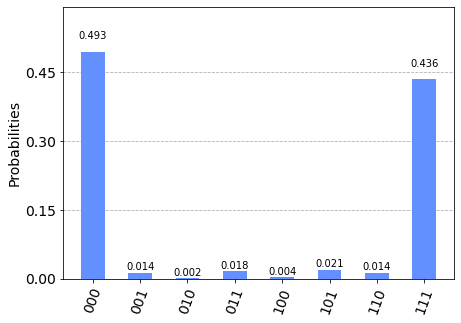

ibmqfactory.load_account:WARNING:2022-04-01 00:07:51,785: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2022-04-01 00:07:55,225: Credentials are already in use. The existing account in the session will be replaced.


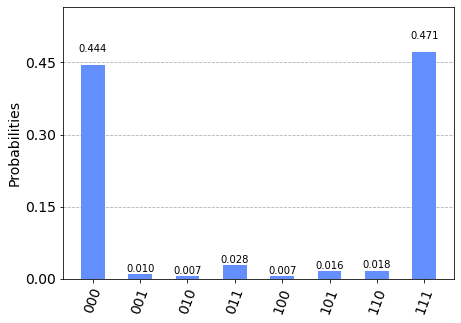

In [6]:
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute
from qiskit import IBMQ, Aer
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel

# Build noise model from backend properties
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
n=2

backend = backends.real_machine()
noise_model = NoiseModel.from_backend(backend)


# Get coupling map from backend
coupling_map = backend.configuration().coupling_map

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

# Make a circuit
circ = QuantumCircuit(3, 3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure([0, 1, 2], [0, 1, 2])

# Perform a noise simulation
result = execute(circ, Aer.get_backend('qasm_simulator'),
                 coupling_map=coupling_map,
                 basis_gates=basis_gates,
                 noise_model=noise_model).result()
counts = result.get_counts(0)
plot_histogram(counts)

In [8]:
type(result)


qiskit.result.result.Result

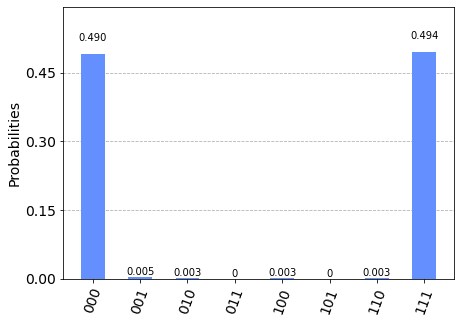

In [11]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
import qiskit.providers.aer.noise as noise

# Error probabilities
prob_1 = 0.001  # 1-qubit gate
prob_2 = 0.01   # 2-qubit gate

# Depolarizing quantum errors
error_1 = noise.depolarizing_error(prob_1, 1)
error_2 = noise.depolarizing_error(prob_2, 2)

# Add errors to noise model
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1, ['u1', 'u2', 'u3'])
noise_model.add_all_qubit_quantum_error(error_2, ['cx'])

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

# Make a circuit
circ = QuantumCircuit(3, 3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure([0, 1, 2], [0, 1, 2])

# Perform a noise simulation
result = execute(circ, Aer.get_backend('qasm_simulator'),
                 basis_gates=basis_gates,
                 noise_model=noise_model).result()
counts = result.get_counts(0)
plot_histogram(counts)

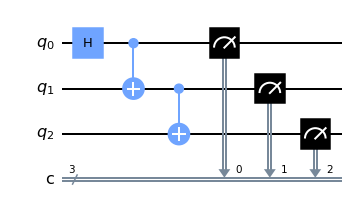

In [14]:
circ.draw('mpl')

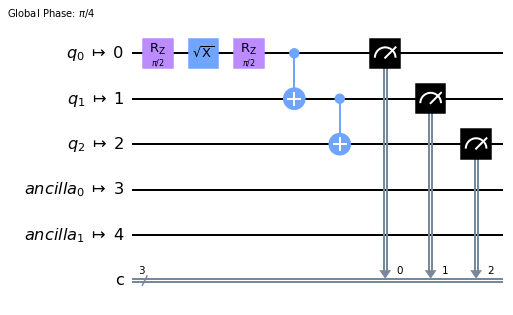

In [18]:
from qiskit import transpile

qc_compiled = transpile(circ, backend)

qc_compiled.draw('mpl')